# Acerca del conjunto de datos

### Contexto
El sistema métrico se usa en la mayoría de las naciones para medir la estatura. A pesar de que el sistema métrico es el método de medición más utilizado, ofreceremos estaturas promedio en unidades métricas e imperiales para cada país. Para ser claros, el sistema imperial utiliza pies y pulgadas para medir la altura, mientras que el sistema métrico utiliza metros y centímetros. Aunque cambiar entre estas unidades de medida no es difícil, los países tienden a elegir una u otra para mantener la uniformidad.

### Contenido
El conjunto de datos contiene seis columnas:
• Rango
• Nombre del país
• Altura masculina en cm
• Altura femenina en cm
• Altura masculina en pies
• Altura femenina en pies

### Agradecimientos
Los usuarios pueden usar, copiar, distribuir y citar el conjunto de datos de la siguiente manera: "Majyhain, altura promedio de hombres y mujeres por país 2022, conjunto de datos de Kaggle, 2 de febrero de 2022".

### Inspiración
Las ideas para estos datos son:
¿Estatura promedio de los hombres en los países?
¿Estatura promedio de las mujeres en los países?
¿Altura de hombres y mujeres en pies?

¿Qué país tiene el hombre y la mujer más altos?

¿Qué países tienen la estatura promedio masculina y femenina más baja?

### Referencias:
Los datos se recopilan de los siguientes sitios:

https://ourworldindata.org/

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
ruta = 'C:/Users/arfeldman/Desktop/DataDash/datasets/Height of Male and Female by Country 2022.csv'
df = pd.read_csv(ruta)

In [68]:
df.shape

(199, 6)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 199 non-null    int64  
 1   Country Name         199 non-null    object 
 2   Male Height in Cm    199 non-null    float64
 3   Female Height in Cm  199 non-null    float64
 4   Male Height in Ft    199 non-null    float64
 5   Female Height in Ft  199 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [70]:
df.isnull().sum()

Rank                   0
Country Name           0
Male Height in Cm      0
Female Height in Cm    0
Male Height in Ft      0
Female Height in Ft    0
dtype: int64

In [71]:
df.rename(
    columns={
        'Rank':'ranking',
        'Country Name':'pais',
        'Male Height in Cm':'hombre_en_cm',
        'Female Height in Cm':'mujer_cm',
        'Male Height in Ft':'hombre_pies',
        'Female Height in Ft':'mujer_pies',
    },
    inplace=True
)

In [72]:
df.describe()

,ranking,hombre_en_cm,mujer_cm,hombre_pies,mujer_pies
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,173.089045,160.942915,5.678794,5.280402
std,57.590508,4.949832,4.076377,0.162510,0.133870
min,1.000000,160.130000,150.910000,5.250000,4.950000
25%,50.500000,169.490000,158.240000,5.560000,5.190000
50%,100.000000,173.530000,160.620000,5.690000,5.270000
75%,149.500000,176.510000,163.870000,5.790000,5.375000
max,199.000000,183.780000,170.360000,6.030000,5.590000


In [73]:
df.drop(columns=['ranking'],inplace=True)

In [74]:
def histogramas(x):
    x = x.select_dtypes(include=['int64','float'])
    cant = x.shape[1]
    plt.style.use('seaborn')
    fig,ax =plt.subplots(nrows=cant,ncols=1,figsize=(7,13),sharex=False,sharey=False)
    a = 0
    for i in x.columns:
        data = x.loc[:,i:i]
        ax[a].hist(data,bins=10)
        ax[a].set_title(i)
        a = a + 1
    fig.tight_layout()
    plt.show()

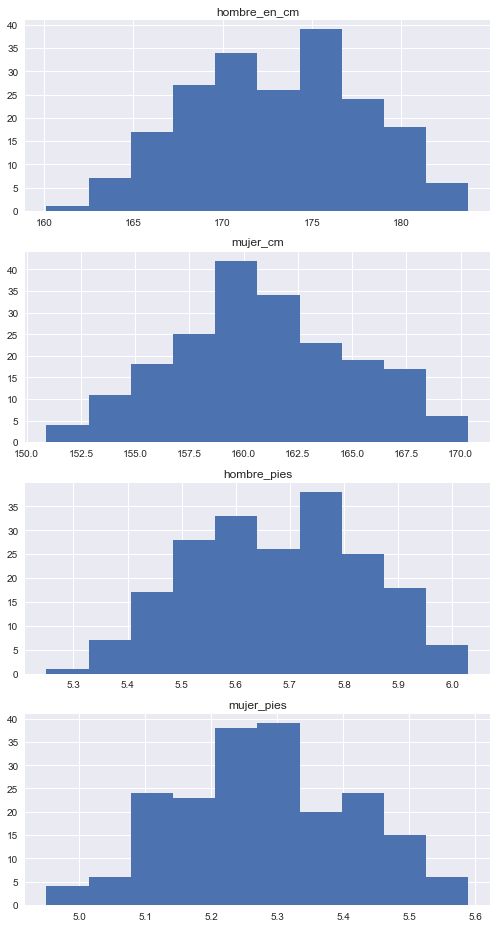

In [75]:
histogramas(df)

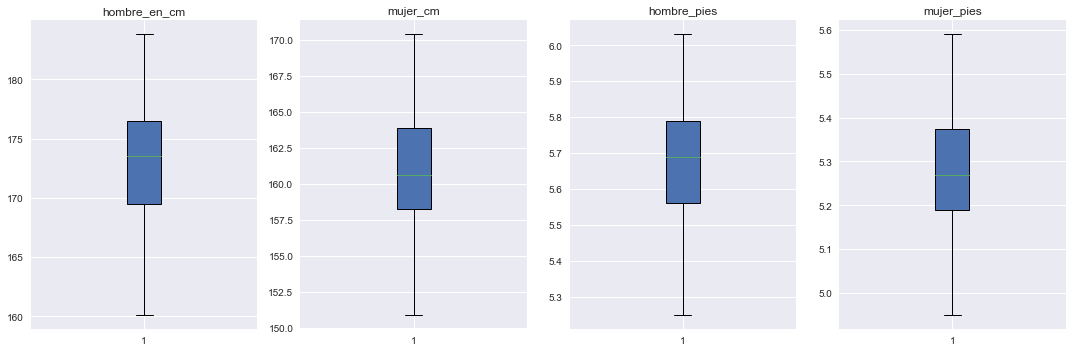

In [76]:
def boxplt(x):
    x = x.select_dtypes(exclude='object')
    cant = len(x.columns)
    fig,ax = plt.subplots(nrows=1,ncols=cant,sharex=False,sharey=False,figsize=(15,5))
    a = 0
    for i in x.columns:
        ax[a].boxplot(x[f'{i}'],patch_artist=True)
        ax[a].set_title(f'{i}')
        a = a + 1
    fig.tight_layout()
    plt.show()

boxplt(df)

### Inspiración
###### Las ideas para estos datos son:
###### ¿Qué país tiene el hombre y la mujer más altos?
###### ¿Qué país tiene el hombre y la mujer más bajos?
###### ¿Qué países estan dentro del promedio de altura de hombres y mujeres?
###### ¿Cual es la moda de la altura de hombres y mujeres?

In [81]:
h_mas_alto = df.hombre_en_cm.max()
pais_mas_alto = df[(df.hombre_en_cm==h_mas_alto)]
print(pais_mas_alto)

h_mas_bajo = df.hombre_en_cm.min()
pais_mas_bajo= df[(df.hombre_en_cm==h_mas_bajo)]
print(pais_mas_bajo)

          pais  hombre_en_cm  mujer_cm  hombre_pies  mujer_pies
0  Netherlands        183.78    170.36         6.03        5.59
            pais  hombre_en_cm  mujer_cm  hombre_pies  mujer_pies
198  Timor-Leste        160.13    152.71         5.25        5.01


In [83]:
m_mas_alto = df.mujer_cm.max()
pais_mas_alto = df[(df.mujer_cm==m_mas_alto)]
print(pais_mas_alto)

m_mas_baja = df.mujer_cm.min()
pais_mas_bajo= df[(df.mujer_cm==m_mas_baja)]
print(pais_mas_bajo)

          pais  hombre_en_cm  mujer_cm  hombre_pies  mujer_pies
0  Netherlands        183.78    170.36         6.03        5.59
          pais  hombre_en_cm  mujer_cm  hombre_pies  mujer_pies
193  Guatemala        164.36    150.91         5.39        4.95


In [85]:
df[(df.hombre_en_cm==df.hombre_en_cm.mean())]

,pais,hombre_en_cm,mujer_cm,hombre_pies,mujer_pies


In [86]:
df[(df.hombre_en_cm==df.hombre_en_cm.median())]

,pais,hombre_en_cm,mujer_cm,hombre_pies,mujer_pies
99,Venezuela,173.53,160.04,5.69,5.25
100,Taiwan,173.53,160.70,5.69,5.27


In [94]:
moda = float(df.hombre_en_cm.mode())
df[ ( df.hombre_en_cm == moda )]

,pais,hombre_en_cm,mujer_cm,hombre_pies,mujer_pies
128,Mongolia,170.67,159.89,5.6,5.25
129,El Salvador,170.67,156.39,5.6,5.13
130,Saudi Arabia,170.67,158.84,5.6,5.21


In [97]:
df.describe(include='all')

,pais,hombre_en_cm,mujer_cm,hombre_pies,mujer_pies
count,199,199.000000,199.000000,199.000000,199.000000
unique,199,NaN,NaN,NaN,NaN
top,Netherlands,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,173.089045,160.942915,5.678794,5.280402
std,NaN,4.949832,4.076377,0.162510,0.133870
min,NaN,160.130000,150.910000,5.250000,4.950000
25%,NaN,169.490000,158.240000,5.560000,5.190000
50%,NaN,173.530000,160.620000,5.690000,5.270000
75%,NaN,176.510000,163.870000,5.790000,5.375000
